### Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
path = "/Users/jaymarkugay/Documents/Career Growth/Python Project/machine-learning/kaggle-machine-learning/grocery-inventory/data/raw/grocery-inventory.csv"
df = pd.read_csv(path)


## EDA

In [4]:
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


In [5]:
df.columns

Index(['Product_Name', 'Catagory', 'Supplier_Name', 'Warehouse_Location',
       'Status', 'Product_ID', 'Supplier_ID', 'Date_Received',
       'Last_Order_Date', 'Expiration_Date', 'Stock_Quantity', 'Reorder_Level',
       'Reorder_Quantity', 'Unit_Price', 'Sales_Volume',
       'Inventory_Turnover_Rate', 'percentage'],
      dtype='object')

In [6]:
unique_status = df['Status'].unique() 
print("Unique values in 'status' column:", unique_status)

Unique values in 'status' column: ['Discontinued' 'Backordered' 'Active']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [8]:
productName_asc = df.sort_values(by=['Product_Name'], ascending=True)
productName_asc.head(10)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
867,All-Purpose Flour,Grains & Pulses,Wikibox,21629 Burrows Pass,Discontinued,14-489-8669,28-436-5158,7/24/2024,11/5/2024,5/13/2024,54,69,68,$1.75,77,56,-109%
73,All-Purpose Flour,Grains & Pulses,Dabjam,050 Mcbride Avenue,Discontinued,21-120-6238,86-292-4587,12/3/2024,5/26/2024,9/5/2024,55,33,14,$1.75,34,62,057%
157,All-Purpose Flour,Grains & Pulses,Pixonyx,336 Old Shore Lane,Active,52-392-5312,78-092-4768,11/6/2024,2/19/2025,7/24/2024,50,42,20,$1.75,87,59,-184%
493,Almond Flour,Grains & Pulses,Camido,16 Fair Oaks Pass,Backordered,41-131-3841,55-269-1746,10/29/2024,1/23/2025,3/20/2024,77,19,31,$9.50,27,25,-017%
889,Almond Flour,Grains & Pulses,Trilia,153 Caliangt Plaza,Backordered,37-567-3218,03-257-4437,7/30/2024,10/31/2024,7/20/2024,37,47,34,$9.50,38,89,-006%
92,Almond Flour,Grains & Pulses,Trudoo,4627 Amoth Circle,Active,17-493-4579,67-541-7091,10/4/2024,11/8/2024,5/28/2024,76,8,2,$9.50,24,53,-010%
851,Almond Flour,Grains & Pulses,Voonte,65 Merry Circle,Discontinued,28-003-8065,42-579-7177,7/19/2024,2/16/2025,1/28/2025,79,47,51,$9.50,83,69,030%
418,Almond Flour,Grains & Pulses,Pixonyx,879 Amoth Terrace,Active,72-404-5581,18-065-8014,1/23/2025,8/7/2024,2/8/2025,54,17,90,$9.50,60,20,052%
932,Almond Flour,Grains & Pulses,Thoughtblab,6 Acker Street,Active,77-377-1659,64-674-3902,8/25/2024,1/22/2025,6/19/2024,74,22,91,$9.50,24,12,045%
936,Almond Flour,Grains & Pulses,Eimbee,5426 Fordem Pass,Backordered,77-224-2227,89-226-5813,8/26/2024,9/30/2024,10/26/2024,75,46,75,$9.50,43,77,-017%


In [9]:
almond_flour_noCat = productName_asc[productName_asc['Product_Name'] == 
                               'Almond Flour'].sort_values(by=['Last_Order_Date'], ascending=True).drop(columns=
                               ['Catagory'])


In [10]:
almond_flour_noCat

,Product_Name,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
932,Almond Flour,Thoughtblab,6 Acker Street,Active,77-377-1659,64-674-3902,8/25/2024,1/22/2025,6/19/2024,74,22,91,$9.50,24,12,045%
493,Almond Flour,Camido,16 Fair Oaks Pass,Backordered,41-131-3841,55-269-1746,10/29/2024,1/23/2025,3/20/2024,77,19,31,$9.50,27,25,-017%
669,Almond Flour,Skaboo,2 Columbus Drive,Discontinued,36-531-4087,83-172-5527,3/24/2024,10/25/2024,3/14/2024,85,12,94,$9.50,26,32,009%
889,Almond Flour,Trilia,153 Caliangt Plaza,Backordered,37-567-3218,03-257-4437,7/30/2024,10/31/2024,7/20/2024,37,47,34,$9.50,38,89,-006%
92,Almond Flour,Trudoo,4627 Amoth Circle,Active,17-493-4579,67-541-7091,10/4/2024,11/8/2024,5/28/2024,76,8,2,$9.50,24,53,-010%
191,Almond Flour,Shuffledrive,2 Veith Crossing,Active,74-234-0628,49-559-7092,5/8/2024,12/15/2024,5/13/2024,12,56,92,$9.50,56,6,040%
851,Almond Flour,Voonte,65 Merry Circle,Discontinued,28-003-8065,42-579-7177,7/19/2024,2/16/2025,1/28/2025,79,47,51,$9.50,83,69,030%
880,Almond Flour,Brainverse,1468 Meadow Vale Court,Backordered,62-509-0666,16-419-1419,7/28/2024,5/15/2024,7/3/2024,13,88,7,$9.50,24,21,-051%
418,Almond Flour,Pixonyx,879 Amoth Terrace,Active,72-404-5581,18-065-8014,1/23/2025,8/7/2024,2/8/2025,54,17,90,$9.50,60,20,052%
936,Almond Flour,Eimbee,5426 Fordem Pass,Backordered,77-224-2227,89-226-5813,8/26/2024,9/30/2024,10/26/2024,75,46,75,$9.50,43,77,-017%


almond_flour_noCat shows  that the columns with date are treated as string instead of date

In [11]:
df['Date_Received'] = pd.to_datetime(
    df['Date_Received'],
    format='%m/%d/%Y',
    errors='coerce'
)

df['Last_Order_Date'] = pd.to_datetime(
    df['Last_Order_Date'],
    format='%m/%d/%Y',
    errors='coerce'
)

df['Expiration_Date'] = pd.to_datetime(
    df['Expiration_Date'],
    format='%m/%d/%Y',
    errors='coerce'
)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul

In [13]:
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,$7.00,91,77,2.17%


saw the unit price is in object form must change to int or float

In [14]:
df['Currency'] = "USD"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul

In [16]:
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,$4.60,96,55,1.96%,USD
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,$2.00,24,83,0.91%,USD
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,$12.00,35,24,1.36%,USD
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,$1.50,44,95,1.36%,USD
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,$7.00,91,77,2.17%,USD


change percentage also in float type

In [17]:
df['percentage'] = df['percentage'].str.replace('%', '').astype(float) / 100.0
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,$4.60,96,55,0.0196,USD
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,$2.00,24,83,0.0091,USD
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,$12.00,35,24,0.0136,USD
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,$1.50,44,95,0.0136,USD
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,$7.00,91,77,0.0217,USD


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul

In [19]:
df['Unit_Price'] = df['Unit_Price'].str.replace('$', '').astype(float) 
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,4.6,96,55,0.0196,USD
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,2.0,24,83,0.0091,USD
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,12.0,35,24,0.0136,USD
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,1.5,44,95,0.0136,USD
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,7.0,91,77,0.0217,USD


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul

In [21]:
productName_asc = df.sort_values(by=['Product_Name'], ascending=True)
almond_flour_noCat = productName_asc[productName_asc['Product_Name'] == 
                               'Almond Flour'].sort_values(by=['Last_Order_Date'], ascending=True).drop(columns=
                               ['Catagory'])
almond_flour_noCat

,Product_Name,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency
880,Almond Flour,Brainverse,1468 Meadow Vale Court,Backordered,62-509-0666,16-419-1419,2024-07-28,2024-05-15,2024-07-03,13,88,7,9.5,24,21,-0.51,USD
418,Almond Flour,Pixonyx,879 Amoth Terrace,Active,72-404-5581,18-065-8014,2025-01-23,2024-08-07,2025-02-08,54,17,90,9.5,60,20,0.52,USD
936,Almond Flour,Eimbee,5426 Fordem Pass,Backordered,77-224-2227,89-226-5813,2024-08-26,2024-09-30,2024-10-26,75,46,75,9.5,43,77,-0.17,USD
669,Almond Flour,Skaboo,2 Columbus Drive,Discontinued,36-531-4087,83-172-5527,2024-03-24,2024-10-25,2024-03-14,85,12,94,9.5,26,32,0.09,USD
889,Almond Flour,Trilia,153 Caliangt Plaza,Backordered,37-567-3218,03-257-4437,2024-07-30,2024-10-31,2024-07-20,37,47,34,9.5,38,89,-0.06,USD
92,Almond Flour,Trudoo,4627 Amoth Circle,Active,17-493-4579,67-541-7091,2024-10-04,2024-11-08,2024-05-28,76,8,2,9.5,24,53,-0.10,USD
191,Almond Flour,Shuffledrive,2 Veith Crossing,Active,74-234-0628,49-559-7092,2024-05-08,2024-12-15,2024-05-13,12,56,92,9.5,56,6,0.40,USD
932,Almond Flour,Thoughtblab,6 Acker Street,Active,77-377-1659,64-674-3902,2024-08-25,2025-01-22,2024-06-19,74,22,91,9.5,24,12,0.45,USD
493,Almond Flour,Camido,16 Fair Oaks Pass,Backordered,41-131-3841,55-269-1746,2024-10-29,2025-01-23,2024-03-20,77,19,31,9.5,27,25,-0.17,USD
851,Almond Flour,Voonte,65 Merry Circle,Discontinued,28-003-8065,42-579-7177,2024-07-19,2025-02-16,2025-01-28,79,47,51,9.5,83,69,0.30,USD


In [ ]:
df['Order_Received_Diff'] = (df['Date_Received'] - df['Last_Order_Date']).dt.days
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency,Order_Received_Diff
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,4.6,96,55,0.0196,USD,-311
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,2.0,24,83,0.0091,USD,-48
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,12.0,35,24,0.0136,USD,-264
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,1.5,44,95,0.0136,USD,-225
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,7.0,91,77,0.0217,USD,-88


In [23]:
df['Shelf_Life_Days'] = (df['Expiration_Date'] - df['Date_Received']).dt.days
df.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency,Order_Received_Diff,Shelf_Life_Days
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,4.6,96,55,0.0196,USD,-311,336
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,2.0,24,83,0.0091,USD,-48,71
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,12.0,35,24,0.0136,USD,-264,7
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,1.5,44,95,0.0136,USD,-225,148
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,7.0,91,77,0.0217,USD,-88,19


In [24]:
df.head(5).sort_values(by=['Shelf_Life_Days'], ascending=True)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Currency,Order_Received_Diff,Shelf_Life_Days
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,2024-04-01,2024-12-21,2024-04-08,38,67,66,12.0,35,24,0.0136,USD,-264,7
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,2024-05-01,2024-07-28,2024-05-20,27,22,89,7.0,91,77,0.0217,USD,-88,19
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,2024-04-01,2024-05-19,2024-06-11,51,87,86,2.0,24,83,0.0091,USD,-48,71
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,2024-05-01,2024-12-12,2024-09-26,51,60,98,1.5,44,95,0.0136,USD,-225,148
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,2024-03-01,2025-01-06,2025-01-31,46,64,17,4.6,96,55,0.0196,USD,-311,336


In [25]:
df_product_date_status = df[['Product_Name', 'Catagory', 'Warehouse_Location', 'Status',
                               'Last_Order_Date', 'Date_Received', 'Order_Received_Diff', 'Expiration_Date',
                               'Shelf_Life_Days',]].sort_values(by=['Product_Name', 'Last_Order_Date'], ascending=True) 
df_product_date_status.head(10)

,Product_Name,Catagory,Warehouse_Location,Status,Last_Order_Date,Date_Received,Order_Received_Diff,Expiration_Date,Shelf_Life_Days
73,All-Purpose Flour,Grains & Pulses,050 Mcbride Avenue,Discontinued,2024-05-26,2024-12-03,191,2024-09-05,-89
867,All-Purpose Flour,Grains & Pulses,21629 Burrows Pass,Discontinued,2024-11-05,2024-07-24,-104,2024-05-13,-72
157,All-Purpose Flour,Grains & Pulses,336 Old Shore Lane,Active,2025-02-19,2024-11-06,-105,2024-07-24,-105
880,Almond Flour,Grains & Pulses,1468 Meadow Vale Court,Backordered,2024-05-15,2024-07-28,74,2024-07-03,-25
418,Almond Flour,Grains & Pulses,879 Amoth Terrace,Active,2024-08-07,2025-01-23,169,2025-02-08,16
936,Almond Flour,Grains & Pulses,5426 Fordem Pass,Backordered,2024-09-30,2024-08-26,-35,2024-10-26,61
669,Almond Flour,Grains & Pulses,2 Columbus Drive,Discontinued,2024-10-25,2024-03-24,-215,2024-03-14,-10
889,Almond Flour,Grains & Pulses,153 Caliangt Plaza,Backordered,2024-10-31,2024-07-30,-93,2024-07-20,-10
92,Almond Flour,Grains & Pulses,4627 Amoth Circle,Active,2024-11-08,2024-10-04,-35,2024-05-28,-129
191,Almond Flour,Grains & Pulses,2 Veith Crossing,Active,2024-12-15,2024-05-08,-221,2024-05-13,5


In [26]:
df_negative_order_received_diff = df_product_date_status[df_product_date_status['Order_Received_Diff'] < 0]
df_negative_order_received_diff

,Product_Name,Catagory,Warehouse_Location,Status,Last_Order_Date,Date_Received,Order_Received_Diff,Expiration_Date,Shelf_Life_Days
867,All-Purpose Flour,Grains & Pulses,21629 Burrows Pass,Discontinued,2024-11-05,2024-07-24,-104,2024-05-13,-72
157,All-Purpose Flour,Grains & Pulses,336 Old Shore Lane,Active,2025-02-19,2024-11-06,-105,2024-07-24,-105
936,Almond Flour,Grains & Pulses,5426 Fordem Pass,Backordered,2024-09-30,2024-08-26,-35,2024-10-26,61
669,Almond Flour,Grains & Pulses,2 Columbus Drive,Discontinued,2024-10-25,2024-03-24,-215,2024-03-14,-10
889,Almond Flour,Grains & Pulses,153 Caliangt Plaza,Backordered,2024-10-31,2024-07-30,-93,2024-07-20,-10
...,...,...,...,...,...,...,...,...,...
790,Yogurt,Dairy,6211 Hanson Terrace,Discontinued,2024-06-27,2024-06-15,-12,2025-02-01,231
9,Yogurt,Dairy,14042 Dottie Avenue,Backordered,2024-11-09,2024-06-01,-161,2024-10-25,146
715,Zucchini,Fruits & Vegetables,8 Russell Pass,Discontinued,2024-09-14,2024-04-20,-147,2024-04-19,-1
470,Zucchini,Fruits & Vegetables,265 Columbus Way,Active,2024-11-16,2024-10-24,-23,2024-05-11,-166


In [28]:
df_negative_shelf_life_days = df_product_date_status[df_product_date_status['Shelf_Life_Days'] < 0]
df_negative_shelf_life_days.head(10)

,Product_Name,Catagory,Warehouse_Location,Status,Last_Order_Date,Date_Received,Order_Received_Diff,Expiration_Date,Shelf_Life_Days
73,All-Purpose Flour,Grains & Pulses,050 Mcbride Avenue,Discontinued,2024-05-26,2024-12-03,191,2024-09-05,-89
867,All-Purpose Flour,Grains & Pulses,21629 Burrows Pass,Discontinued,2024-11-05,2024-07-24,-104,2024-05-13,-72
157,All-Purpose Flour,Grains & Pulses,336 Old Shore Lane,Active,2025-02-19,2024-11-06,-105,2024-07-24,-105
880,Almond Flour,Grains & Pulses,1468 Meadow Vale Court,Backordered,2024-05-15,2024-07-28,74,2024-07-03,-25
669,Almond Flour,Grains & Pulses,2 Columbus Drive,Discontinued,2024-10-25,2024-03-24,-215,2024-03-14,-10
889,Almond Flour,Grains & Pulses,153 Caliangt Plaza,Backordered,2024-10-31,2024-07-30,-93,2024-07-20,-10
92,Almond Flour,Grains & Pulses,4627 Amoth Circle,Active,2024-11-08,2024-10-04,-35,2024-05-28,-129
932,Almond Flour,Grains & Pulses,6 Acker Street,Active,2025-01-22,2024-08-25,-150,2024-06-19,-67
493,Almond Flour,Grains & Pulses,16 Fair Oaks Pass,Backordered,2025-01-23,2024-10-29,-86,2024-03-20,-223
464,Anchovies,Seafood,5521 Wayridge Center,Backordered,2024-05-08,2024-10-22,167,2024-08-16,-67


### Graphs

<Axes: title={'center': 'Count of Status for Negative Order Received Difference'}, xlabel='Status', ylabel='count'>

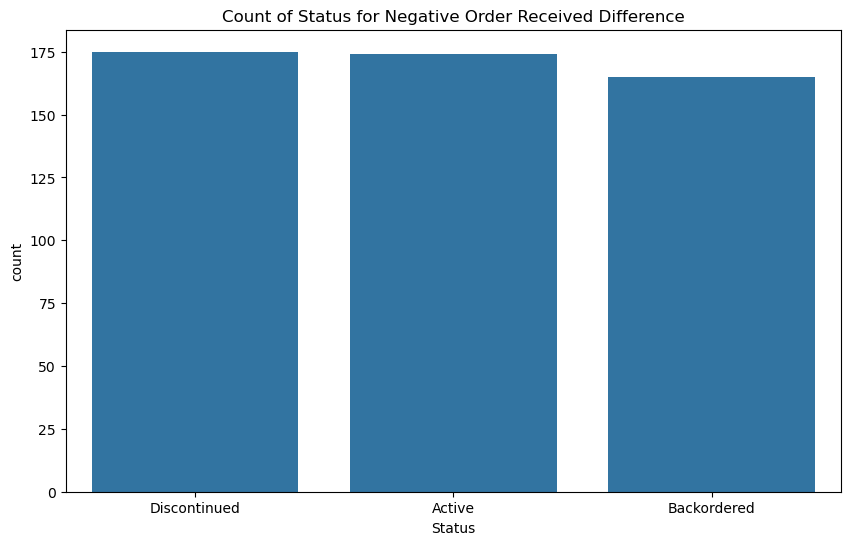

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Count of Status for Negative Order Received Difference')
sns.countplot(x='Status',  data=df_negative_order_received_diff)

<Axes: title={'center': 'Count of Status for Negative Shelf Life Days'}, xlabel='Status', ylabel='count'>

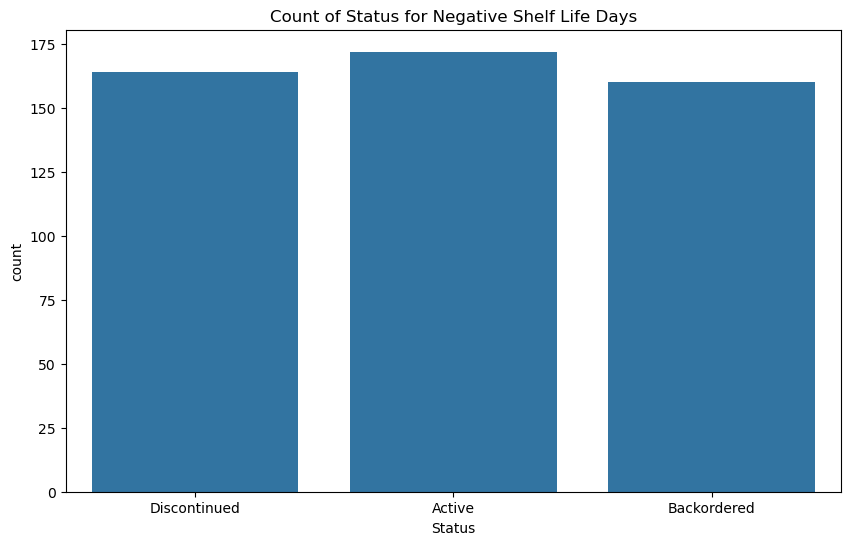

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Count of Status for Negative Shelf Life Days')
sns.countplot(x='Status',  data=df_negative_shelf_life_days)

Text(0.5, 1.0, 'Count of Status for All Products')

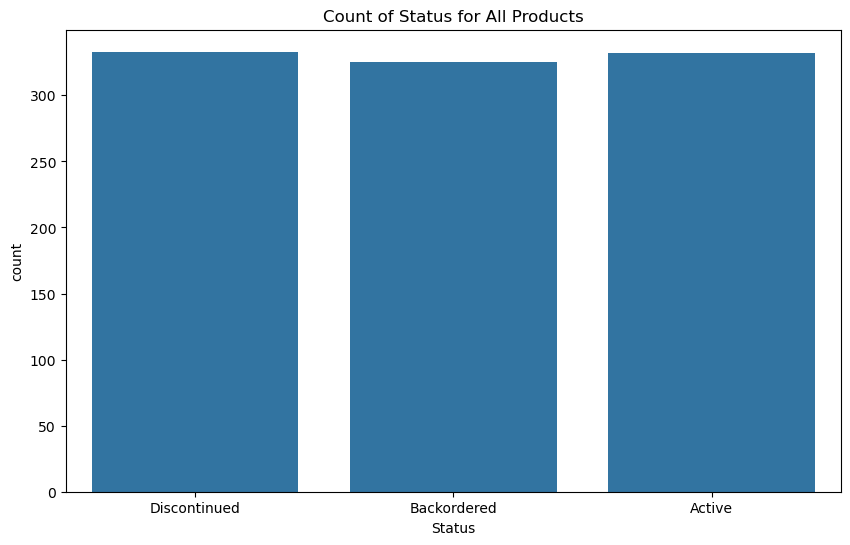

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status',  data=df)
plt.title('Count of Status for All Products')

## Stats and Graph for Main DF

Text(0.5, 1.0, 'Scatter Plot of Order Received Difference vs Shelf Life Days')

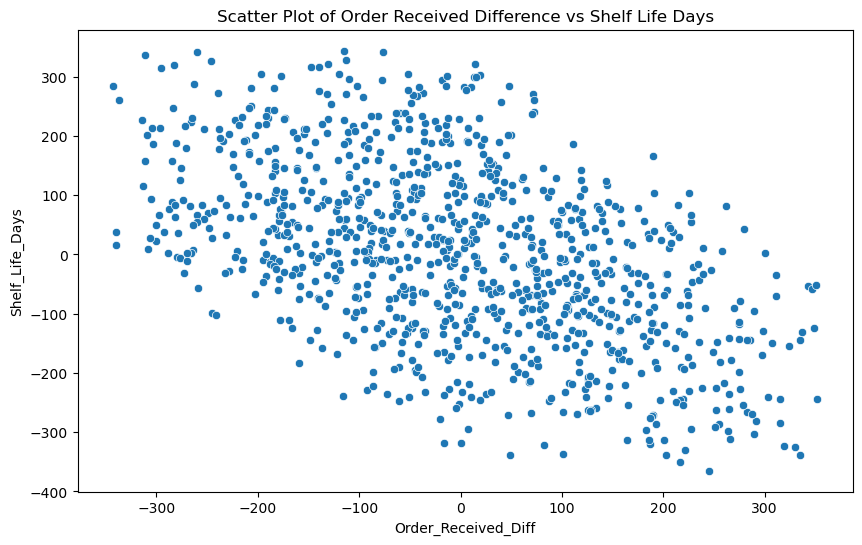

In [41]:
corr_shelfLife_orderReceived = np.corrcoef(df['Order_Received_Diff'], df['Shelf_Life_Days'])[0,1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Received_Diff', y='Shelf_Life_Days', data=df)
plt.title('Scatter Plot of Order Received Difference vs Shelf Life Days')

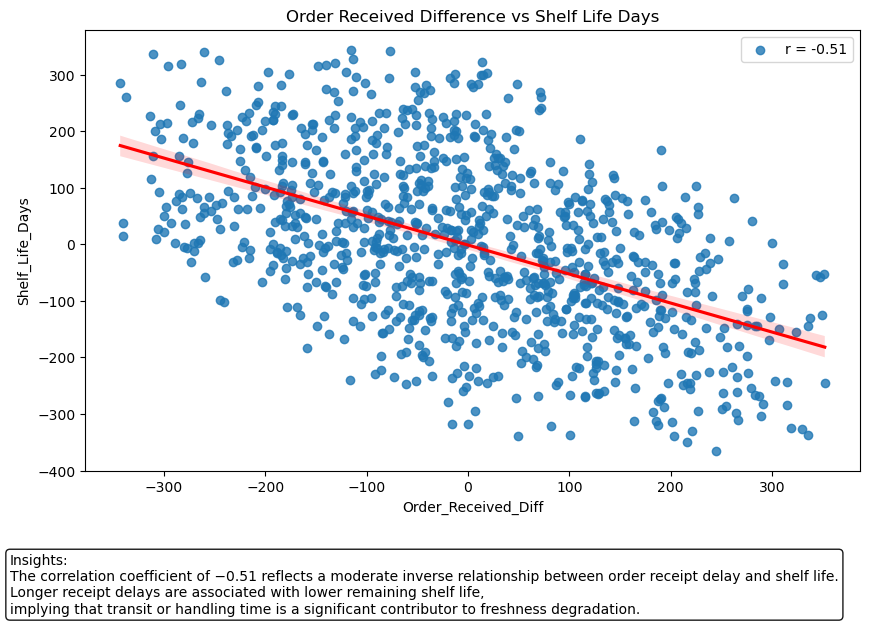

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.regplot(
    x='Order_Received_Diff',
    y='Shelf_Life_Days',
    data=df,
    scatter=True,
    ax=ax,
    label=f'r = {corr_shelfLife_orderReceived:.2f}',
    line_kws={'color': 'red'}
)

ax.set_title('Order Received Difference vs Shelf Life Days')
ax.legend()

insight_text = (
    "Insights:\n"
    "The correlation coefficient of −0.51 reflects a moderate inverse relationship between order receipt delay and shelf life.\n"
    "Longer receipt delays are associated with lower remaining shelf life,\n"
    "implying that transit or handling time is a significant contributor to freshness degradation."
)

# Create space at the bottom
plt.subplots_adjust(bottom=0.25)

# Place text BELOW the axes (figure coordinates)
plt.figtext(
    0.05, 0.05, insight_text,
    ha='left',
    fontsize=10,
    wrap=True,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9)
)

plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul